In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [36]:
def normalize(densities, min_density_threshold):
    
    densities = densities.replace(-1, np.nan)   
    df = densities[densities.sum(axis=1) > min_density_threshold]
    min_normalized_read_number = min([item for item in df.unstack().values if item > 0])
    df = df + min_normalized_read_number
    # make a change to the dataframe
    return df.div(df.sum(axis=1), axis=0),df.div(df.sum(axis=1), axis=0).mean()


In [37]:
### ALL CDS STARTS

# LOOK UP SF3B4
# LOOK UP PRPF8
# 

In [38]:
ip = pd.read_table('/home/bay001/projects/maps_20160420/analysis/tests/262_01_SLBP.ip.raw_density_matrix.csv',sep=',',index_col=0)
inp = pd.read_table('/home/bay001/projects/maps_20160420/analysis/tests/262_01_SLBP.input.raw_density_matrix.csv',sep=',',index_col=0)

### For SLBP: 

In [42]:
ipmeans = normalize(ip,0)[1]
inputmeans = normalize(inp,0)[1]


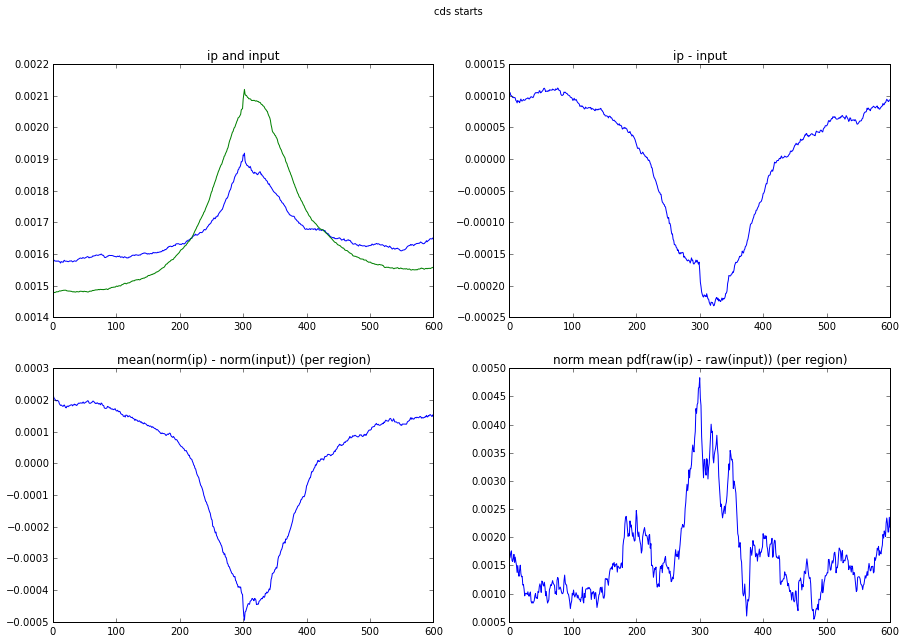

In [52]:
plt.figure(1,figsize=(15,10))
plt.subplot(221)
plt.plot(ipmeans,label='ip')
plt.plot(inputmeans,label='input')
plt.title('ip and input')
plt.subplot(222)
plt.title('ip - input')
plt.plot(ipmeans - inputmeans)
plt.subplot(223)
plt.title('mean(norm(ip) - norm(input)) (per region)')
plt.plot(normalize(ip,0)[0].sub(normalize(inp,0)[0]).dropna().mean())
plt.subplot(224)
plt.title('norm mean pdf(raw(ip) - raw(input)) (per region)')
plt.plot(normalize(ip.sub(inp).dropna(),0)[1])
plt.suptitle('cds starts')

### For RBFOX2:

In [56]:
ip = pd.read_table('/home/bay001/projects/maps_20160420/analysis/tests/204_01_RBFOX2.ip.raw_density_matrix.csv',sep=',',index_col=0)
inp = pd.read_table('/home/bay001/projects/maps_20160420/analysis/tests/204_01_RBFOX2.input.raw_density_matrix.csv',sep=',',index_col=0)

In [57]:
ipmeans = normalize(ip,0)[1]
inputmeans = normalize(inp,0)[1]

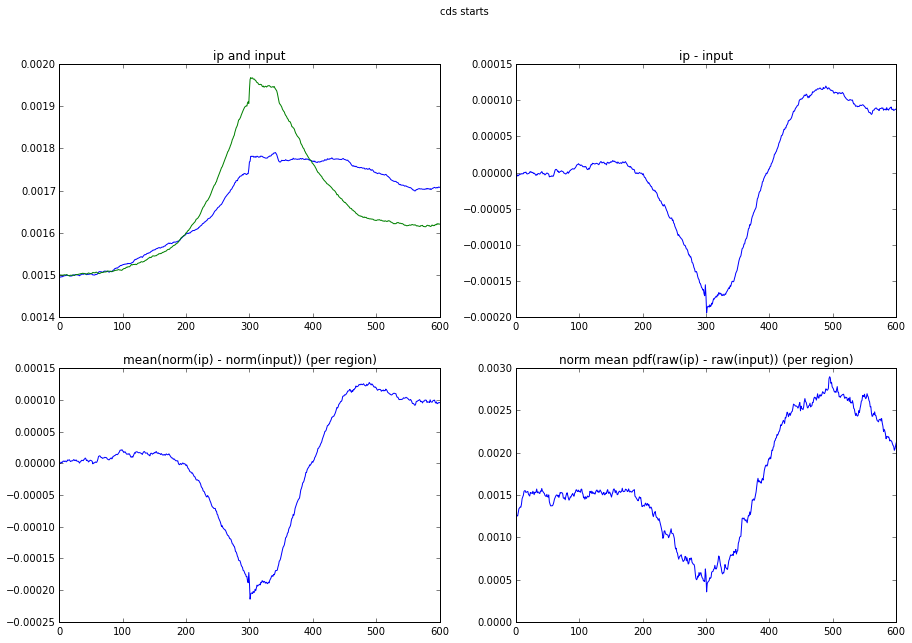

In [58]:
plt.figure(1,figsize=(15,10))
plt.subplot(221)
plt.plot(ipmeans,label='ip')
plt.plot(inputmeans,label='input')
plt.title('ip and input')
plt.subplot(222)
plt.title('ip - input')
plt.plot(ipmeans - inputmeans)
plt.subplot(223)
plt.title('mean(norm(ip) - norm(input)) (per region)')
plt.plot(normalize(ip,0)[0].sub(normalize(inp,0)[0]).dropna().mean())
plt.subplot(224)
plt.title('norm mean pdf(raw(ip) - raw(input)) (per region)')
plt.plot(normalize(ip.sub(inp).dropna(),0)[1])
plt.suptitle('cds starts')

### For U2AF2

In [63]:
ip = pd.read_table('/home/bay001/projects/maps_20160420/analysis/tests/242_01.cdsstarts.raw_density_matrix.csv',sep=',',index_col=0)
inp = pd.read_table('/home/bay001/projects/maps_20160420/analysis/tests/242_01.input.cdsstarts.raw_density_matrix.csv',sep=',',index_col=0)

In [64]:
# flanking regions is 500 so that's why the x axis is 0-1000
ipmeans = normalize(ip,0)[1]
inputmeans = normalize(inp,0)[1]

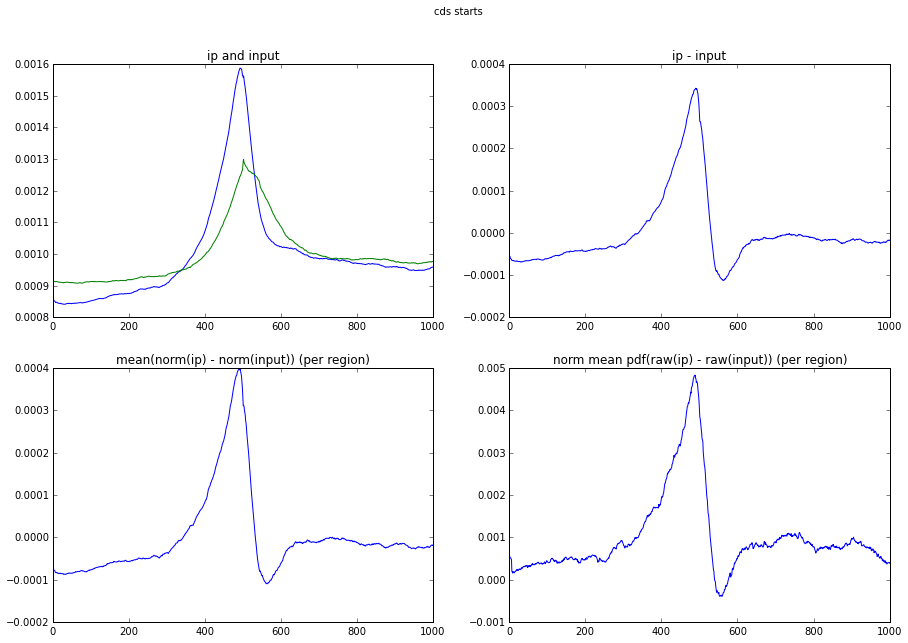

In [65]:
plt.figure(1,figsize=(15,10))
plt.subplot(221)
plt.plot(ipmeans,label='ip')
plt.plot(inputmeans,label='input')
plt.title('ip and input')
plt.subplot(222)
plt.title('ip - input')
plt.plot(ipmeans - inputmeans)
plt.subplot(223)
plt.title('mean(norm(ip) - norm(input)) (per region)')
plt.plot(normalize(ip,0)[0].sub(normalize(inp,0)[0]).dropna().mean())
plt.subplot(224)
plt.title('norm mean pdf(raw(ip) - raw(input)) (per region)')
plt.plot(normalize(ip.sub(inp).dropna(),0)[1])
plt.suptitle('cds starts')

### Try to define a minimum read density cutoff for IP: 

In [94]:
# Plot histogram of density sums for each region. Define minimum readsum threshold as the maximum distance between 
# two consecutive bins. Throw out 'noise' regions of minimum read density. 
# vast majority of regions can be filtered out

def get_limit(n,bins):
    x = 0
    mx = 0
    prev = n[0]
    for i in n[1:]:
        dist = prev - i
        prev = i
        if dist > mx:
            mx = dist
            x = x + 1
    return bins[x]

def normpdf(df):
    min_normalized_read_number = min([item for item in df.unstack().values if item > 0])
    df = df + min_normalized_read_number
    return df.div(df.sum(axis=1),axis=0)

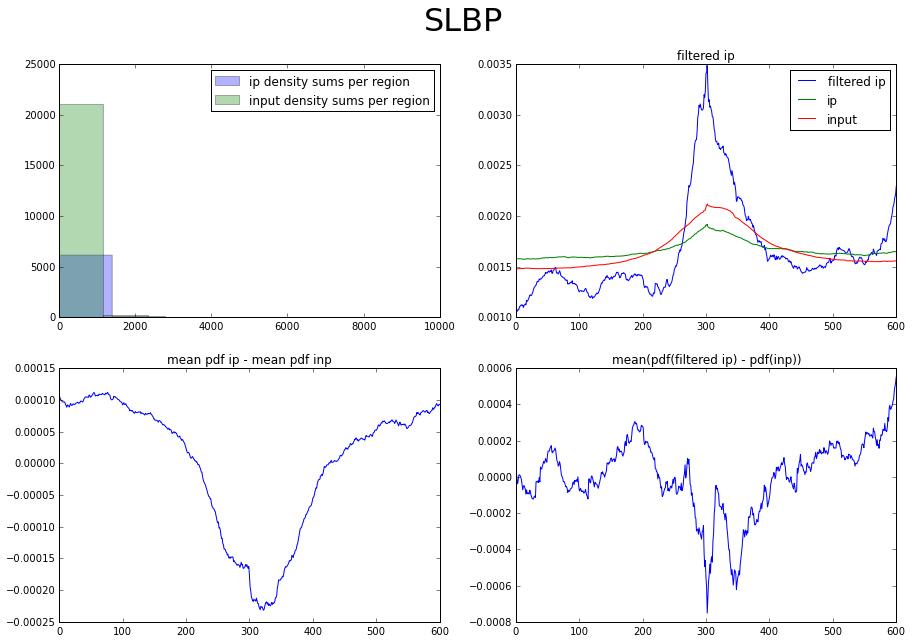

In [130]:
ip = pd.read_table('/home/bay001/projects/maps_20160420/analysis/tests/262_01_SLBP.ip.raw_density_matrix.csv',sep=',',index_col=0)
inp = pd.read_table('/home/bay001/projects/maps_20160420/analysis/tests/262_01_SLBP.input.raw_density_matrix.csv',sep=',',index_col=0)

plt.figure(1,figsize=(15,10))
plt.subplot(221)
ipn, ipbins, ippatches = plt.hist(ip.sum(axis=1), bins=100,alpha=0.3,label='ip density sums per region')
inpn, inpbins, inppatches = plt.hist(inp.sum(axis=1), bins=100,alpha=0.3,label='input density sums per region')
plt.legend()
plt.xlim(0,10000)
plt.subplot(222)
filtered_ip = ip[ip.sum(axis=1) > get_limit(ipn,ipbins)]
plt.title('filtered ip')
plt.plot(normpdf(filtered_ip).mean(),label='filtered ip')
plt.plot(normpdf(ip).mean(),label='ip')
plt.plot(normpdf(inp).mean(),label='input')
plt.legend()
plt.subplot(223)
plt.plot(normpdf(ip).mean() - normpdf(inp).mean())
plt.title('mean pdf ip - mean pdf inp')
plt.subplot(224)
plt.title('mean(pdf(filtered ip) - pdf(inp))')
plt.plot(normpdf(filtered_ip).sub(normpdf(inp)).dropna().mean())
plt.suptitle('SLBP',fontsize=32)

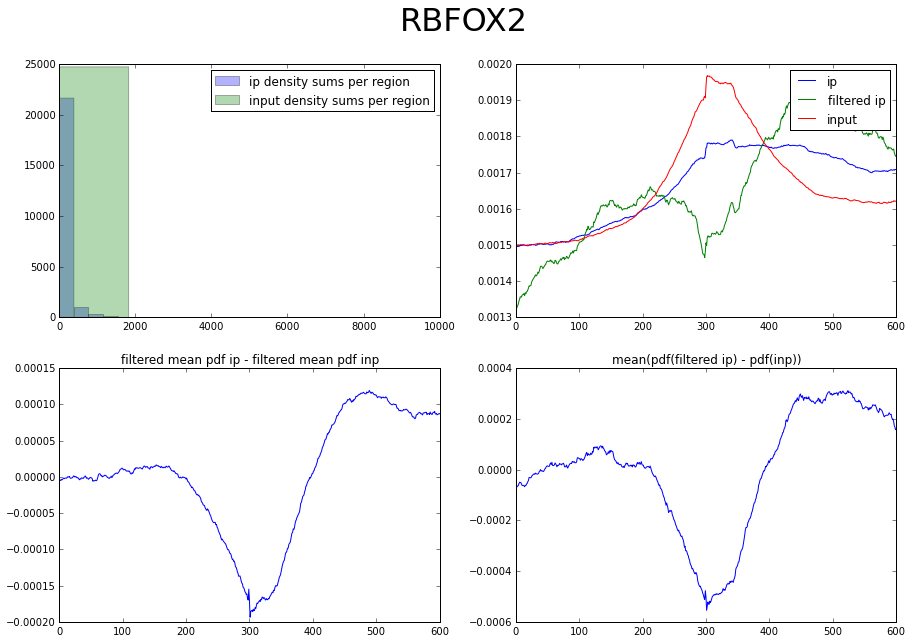

In [131]:
ip = pd.read_table('/home/bay001/projects/maps_20160420/analysis/tests/204_01_RBFOX2.ip.raw_density_matrix.csv',sep=',',index_col=0)
inp = pd.read_table('/home/bay001/projects/maps_20160420/analysis/tests/204_01_RBFOX2.input.raw_density_matrix.csv',sep=',',index_col=0)

plt.figure(1,figsize=(15,10))
plt.subplot(221)
ipn, ipbins, ippatches = plt.hist(ip.sum(axis=1), bins=100,alpha=0.3,label='ip density sums per region')
inpn, inpbins, inppatches = plt.hist(inp.sum(axis=1), bins=100,alpha=0.3,label='input density sums per region')
plt.legend()
plt.xlim(0,10000)
plt.subplot(222)
plt.plot(normpdf(ip).mean(),label='ip')
filtered_ip = ip[ip.sum(axis=1) > get_limit(ipn,ipbins)]
plt.plot(normpdf(filtered_ip).mean(),label='filtered ip')
plt.plot(normpdf(inp).mean(),label='input')
plt.legend()
plt.subplot(223)
plt.plot(normpdf(ip).mean() - normpdf(inp).mean())
plt.title('filtered mean pdf ip - filtered mean pdf inp [original]')
plt.subplot(224)
plt.title('mean(pdf(filtered ip) - pdf(inp)) [per region]')
plt.plot(normpdf(filtered_ip).sub(normpdf(inp)).dropna().mean())
plt.suptitle('RBFOX2',fontsize=32)

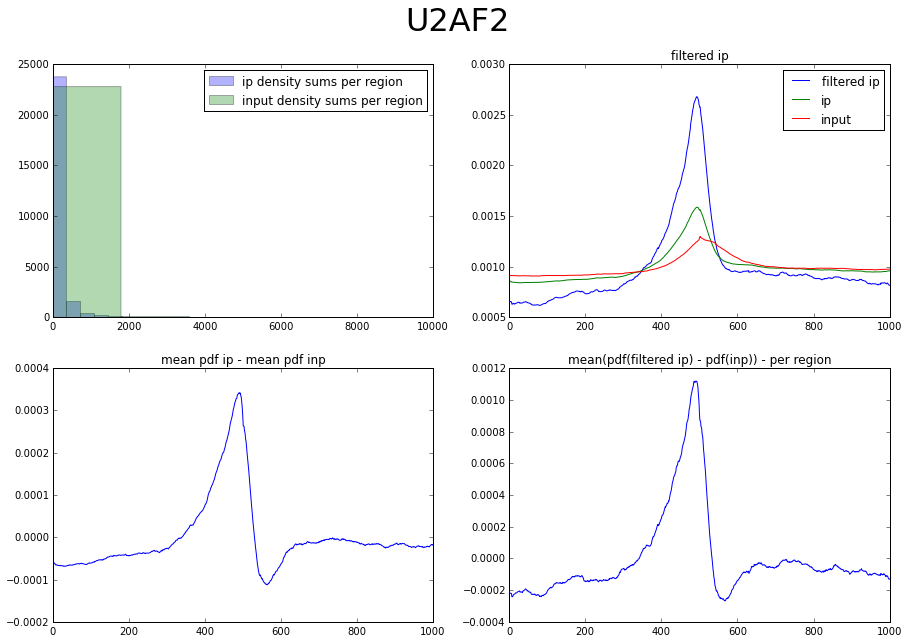

In [132]:
ip = pd.read_table('/home/bay001/projects/maps_20160420/analysis/tests/242_01.cdsstarts.raw_density_matrix.csv',sep=',',index_col=0)
inp = pd.read_table('/home/bay001/projects/maps_20160420/analysis/tests/242_01.input.cdsstarts.raw_density_matrix.csv',sep=',',index_col=0)

plt.figure(1,figsize=(15,10))
plt.subplot(221)
ipn, ipbins, ippatches = plt.hist(ip.sum(axis=1), bins=100,alpha=0.3,label='ip density sums per region')
inpn, inpbins, inppatches = plt.hist(inp.sum(axis=1), bins=100,alpha=0.3,label='input density sums per region')
plt.legend()
plt.xlim(0,10000)
plt.subplot(222)
filtered_ip = ip[ip.sum(axis=1) > get_limit(ipn,ipbins)]
plt.title('filtered ip')
plt.plot(normpdf(filtered_ip).mean(),label='filtered ip')
plt.plot(normpdf(ip).mean(),label='ip')
plt.plot(normpdf(inp).mean(),label='input')
plt.legend()
plt.subplot(223)
plt.plot(normpdf(ip).mean() - normpdf(inp).mean())
plt.title('mean pdf ip - mean pdf inp')
plt.subplot(224)
plt.title('mean(pdf(filtered ip) - pdf(inp)) - per region')
plt.plot(normpdf(filtered_ip).sub(normpdf(inp)).dropna().mean())
plt.suptitle('U2AF2',fontsize=32)

### Try to cluster and take the most representative one:

In [154]:
ip = pd.read_table('/home/bay001/projects/maps_20160420/analysis/tests/242_01.cdsstarts.raw_density_matrix.csv',sep=',',index_col=0)
inp = pd.read_table('/home/bay001/projects/maps_20160420/analysis/tests/242_01.input.cdsstarts.raw_density_matrix.csv',sep=',',index_col=0)

from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
model = KMeans(n_clusters=3)
model.fit_predict(ip.ix[:,].values)

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [155]:
ip['class'] = model.fit_predict(ip.ix[:,].values)

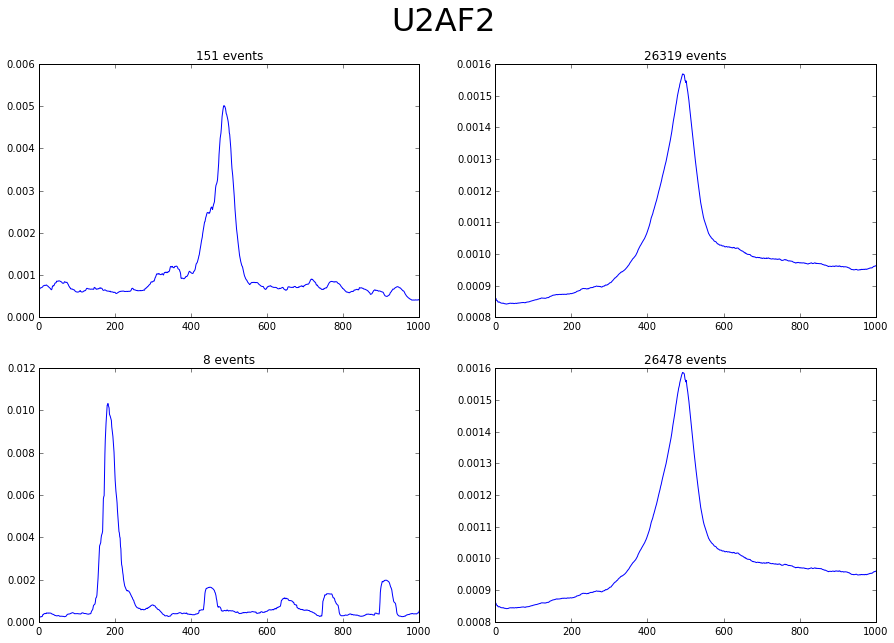

In [156]:
plt.figure(1,figsize=(15,10))
plt.subplot(221)
c1 = ip[ip['class']==0]
del c1['class']
plt.plot(normpdf(c1).mean())
plt.title('{} events'.format(len(ip[ip['class']==0])))
plt.xlim(0,1000)
plt.subplot(222)
c2 = ip[ip['class']==1]
del c2['class']
plt.plot(normpdf(c2).mean())
plt.title('{} events'.format(len(ip[ip['class']==1])))
plt.xlim(0,1000)
plt.subplot(223)
c3 = ip[ip['class']==2]
del c3['class']
plt.plot(normpdf(c3).mean())
plt.title('{} events'.format(len(ip[ip['class']==2])))
plt.xlim(0,1000)
plt.subplot(224)
allip = ip
del allip['class']
plt.plot(normpdf(allip).mean())
plt.title('{} events'.format(len(ip)))
plt.xlim(0,1000)
plt.ylim(0.0008,0.0016)
plt.suptitle('U2AF2',fontsize=32)

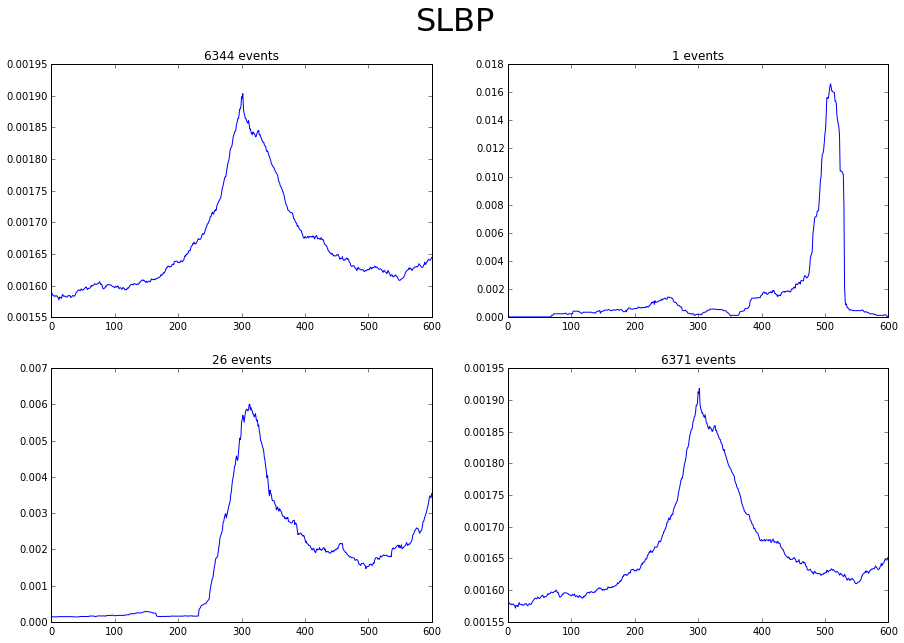

In [190]:
ip = pd.read_table('/home/bay001/projects/maps_20160420/analysis/tests/262_01_SLBP.ip.raw_density_matrix.csv',sep=',',index_col=0)
inp = pd.read_table('/home/bay001/projects/maps_20160420/analysis/tests/262_01_SLBP.input.raw_density_matrix.csv',sep=',',index_col=0)

from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
model = KMeans(n_clusters=3)
model.fit_predict(ip.ix[:,].values)
ip['class'] = model.fit_predict(ip.ix[:,].values)
plt.figure(1,figsize=(15,10))
plt.subplot(221)
c1 = ip[ip['class']==0]
del c1['class']
plt.plot(normpdf(c1).mean())
plt.title('{} events'.format(len(ip[ip['class']==0])))
plt.xlim(0,600)
plt.subplot(222)
c2 = ip[ip['class']==1]
del c2['class']
plt.plot(normpdf(c2).mean())
plt.title('{} events'.format(len(ip[ip['class']==1])))
plt.xlim(0,600)
plt.subplot(223)
c3 = ip[ip['class']==2]
del c3['class']
plt.plot(normpdf(c3).mean())
plt.title('{} events'.format(len(ip[ip['class']==2])))
plt.xlim(0,600)
# plt.ylim(0.0008,0.0016)
plt.subplot(224)
allip = ip
del allip['class']
plt.plot(normpdf(allip).mean())
plt.title('{} events'.format(len(ip)))
plt.xlim(0,600)
# plt.ylim(0.0008,0.0016)
plt.suptitle('SLBP',fontsize=32)

KeyError: 'class'

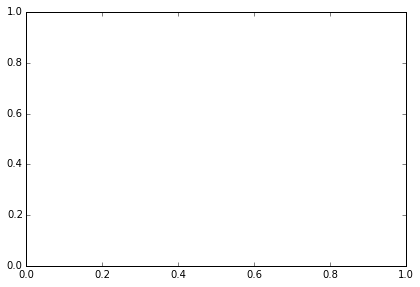

In [188]:
/home/bay001/projects/maps_20160420/analysis/tests/

In [184]:
ip = pd.read_table('/home/bay001/projects/maps_20160420/analysis/tests/227_01_SLTM.raw_density_matrix.csv',sep=',',index_col=0)
inp = pd.read_table('/home/bay001/projects/maps_20160420/analysis/tests/227_01_SLTM_INPUT.raw_density_matrix.csv',sep=',',index_col=0)

### Z-score (in progress)

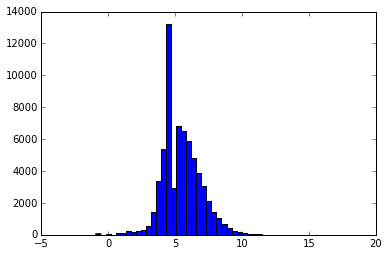

In [185]:
ax = plt.hist(np.log2(ip.sum(axis=1)),bins=50)

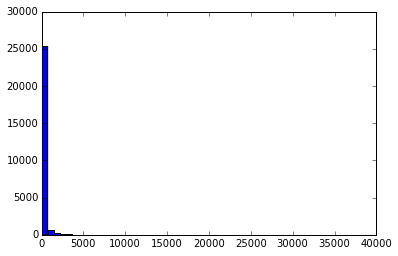

In [183]:
ax = plt.hist(ip.sum(axis=1),bins=50)

In [ ]:
print(len(filtered_ip[filtered_ip['class']==0]))
plt.plot(filtered_ip[filtered_ip['class']==0].mean())
plt.xlim(0,600)

In [ ]:
# This is the mean of pdfs belonging to the biggest cluster
print(len(filtered_ip[filtered_ip['class']==1]))
plt.plot(filtered_ip[filtered_ip['class']==1].mean())
plt.xlim(0,600)

In [ ]:
print(len(filtered_ip[filtered_ip['class']==2]))
plt.plot(filtered_ip[filtered_ip['class']==2].mean())
plt.xlim(0,600)

# make a summary spreadsheet for the number of up and downregulated significant genes
# make error bars 
# for each event, convert score into entropy score


In [ ]:
ip['class'] = model.fit_predict(ip.ix[:,].values)

In [ ]:
filtered_ip[filtered_ip['class']==1]

In [ ]:
plt.plot(filtered_ip[filtered_ip['class']==0].ix['chr11:70268608-70268609:+'])

In [ ]:
plt.plot(filtered_ip[filtered_ip['class']==0].ix['chr16:28847766-28847767:+'])